# Bazaar


#### Prephase: Loading Libraries and Start Working With Data. 
- Global Libraries : `pandas`  <a href = "https://pandas.pydata.org" target="_blank"> (Data analysis Library) </a>|| `numpy` <a href = "https://numpy.org" target="_blank"> (Scientific Computing Libraby) </a>

- Private Libraries: `sql_connect` <a href = "https://docs.microsoft.com/en-us/sql/connect/python/python-driver-for-sql-server?view=sql-server-ver15" target="_blank"> (connects with sql server using ODBC Driver) </a>

- Local Libraries: `excel` <a href = "https://xlsxwriter.readthedocs.io" target="_blank"> (exports data to excel) </a>  || `scrap` <a href = "https://www.crummy.com/software/BeautifulSoup/bs4/doc/" target="_blank"> (a Web Scrap Tool Used to find Online Prices ) </a> || `slack` <a href = "https://api.slack.com/tutorials/tags/cool-tricks" target="_blank"> (a slack specific tool to send files and messages using a BOT) </a> || `sql` <a href = "https://docs.microsoft.com/en-US/sql/t-sql/queries/select-transact-sql?view=sql-server-ver15" target="_blank"> (contains direct queries to sql database using SELECT) </a> || `plot` <a href = "https://matplotlib.org" target="_blank"> (returns data as graph) </a> 



In [1]:
import pandas as pd
import numpy as np
from DISCORD.BAZAAR import excel, scrap, slack, sql, plot
from Private import sql_connect
import matplotlib.pyplot as plt
import seaborn as sns

## STEP 1

- Think about how my excel file will be named: **output_file**
- Think about where i want to store my file: **path_to_file**
- Set my Suppliers Name as it is in My Database: **main_name**

In [2]:
output_file = 'Bazaar.xlsx'
path_to_file = f'/Users/kommas/OneDrive/Business_Folder/Slack/Multiple_emails/{output_file}'
main_name = 'Bazaar A.E.'

## STEP 2

- Read the sql query from my local library and store results to a `Dataframe` using pandas library name the variable: **sql_answer_bazaar** 
- Isolate Brands, store results in **unique_brands**
- Find `MEAN` Markup per Brand, store results in a `var` named: **markup_per_brand**
- Isolate Barcodes in `var`: **barcode_lista**

In [3]:
sql_answer_bazaar = pd.read_sql_query(sql.private_database_query(main_name), sql_connect.connect())

In [4]:
unique_brands = sql_answer_bazaar['BRAND'].unique()

In [5]:
markup_per_brand= [round(sql_answer_bazaar['ΚΕΡΔΟΦΟΡΙΑ'][sql_answer_bazaar['BRAND'] == i].mean() * 100, 2) for i in unique_brands]

In [6]:
barcode_lista = sql_answer_bazaar['BARCODE']

## STEP 3

- Choose Shops to Scrap Data (`scrap.a = BAZAAR`, `scrap.b = ΑΒ. Βασιλόπουλος`, `scrap.e = Care Market`)
- Find Prices for every shop in the list

In [7]:
scrap.shops = [scrap.a, scrap.b, scrap.e]
out = scrap.calculate_prices(barcode_lista)


BAZAAR Start: 11:17:09
LOADING:[██████████████████████████████████████████████████]100%	 HACKING	 [5202178007934]	 
ΑΒ. Βασιλόπουλος Start: 11:17:15
LOADING:[██████████████████████████████████████████████████]100%	 HACKING	 [5202178007934]	 
Care Market Start: 11:17:18
LOADING:[██████████████████████████████████████████████████]100%	 HACKING	 [5202178007934]	 


## STEP 4

- Assign Results to Dataframe
- Isolate Prices

In [8]:
sql_answer_bazaar['ΤΙΜΗ BAZAAR'] = out['BAZAAR']
sql_answer_bazaar['TIMH ΒΑΣΙΛΟΠΟΥΛΟΣ'] = out['ΑΒ. Βασιλόπουλος']
sql_answer_bazaar['TIMH Care Market'] = out['Care Market']

In [9]:
df = sql_answer_bazaar[['ΤΙΜΗ ΛΙΑΝΙΚΗΣ', 'ΤΙΜΗ BAZAAR', 'TIMH ΒΑΣΙΛΟΠΟΥΛΟΣ', 'TIMH Care Market', 'BRAND']]

## STEP 5
- Extract data to excel file

In [10]:
excel.export(path_to_file, sql_answer_bazaar)

In [11]:
sql_answer_bazaar.head()

,ΠΑΡΑΣΤΑΤΙΚΟ,BARCODE,ΠΕΡΙΓΡΑΦΗ,BRAND,ΠΟΣΟΤΗΤΑ,ΚΑΘΑΡΗ ΤΙΜΗ,ΤΙΜΗ ΛΙΑΝΙΚΗΣ,ΚΕΡΔΟΦΟΡΙΑ,ΤΙΜΗ BAZAAR,TIMH ΒΑΣΙΛΟΠΟΥΛΟΣ,TIMH Care Market
0,ΑΤΔ-ΑΓ-032437,5202178000003,"Όλυμπος® Γάλα Ζωής 3,7% Λιπαρά 1ltr",Όλυμπος,12.0,1.175833,1.69,0.271927,1.66,1.66,1.66
1,ΑΤΔ-ΑΓ-032437,5202178000331,"Όλυμπος® Γάλα Κατσικίσιο 3,5% Λιπαρά 1ltr",Όλυμπος,12.0,1.786667,2.75,0.362105,0.00,2.38,2.38
2,ΑΤΔ-ΑΓ-032437,5201054031612,Φάγε® Γιαούρτι Total 2% 200gr x 3,Φάγε,8.0,2.012500,3.95,0.736931,2.30,3.30,2.30
3,ΑΤΔ-ΑΓ-032437,5201054031841,Φάγε® Γιαούρτι Total 200gr x 3,Φάγε,8.0,2.012500,3.95,0.736931,2.30,3.30,2.30
4,ΑΤΔ-ΑΓ-032437,5202178007934,Όλυμπος® Γιαούρτι Στραγγιστό 5% 1kgr,Όλυμπος,6.0,2.306667,4.55,0.745613,2.99,3.95,3.95


## STEP 6

- VISUALIZE DATA

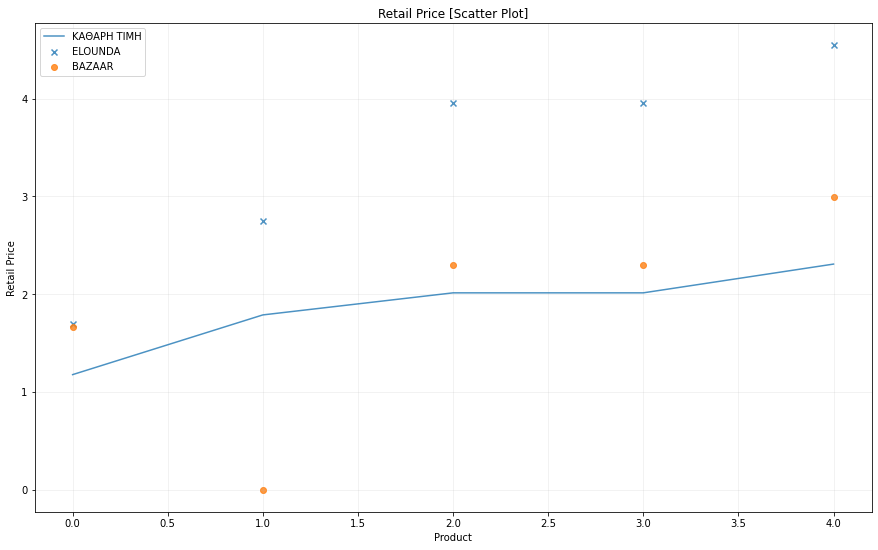

In [12]:

plt.figure(figsize=(15, 9))
plt.subplot(xlabel='Product', ylabel='Retail Price', title='Retail Price [Scatter Plot]')
plt.scatter(range(len(sql_answer_bazaar)), sql_answer_bazaar['ΤΙΜΗ ΛΙΑΝΙΚΗΣ'], marker='x', label='ELOUNDA', alpha=.8)
plt.scatter(range(len(sql_answer_bazaar)), sql_answer_bazaar['ΤΙΜΗ BAZAAR'], marker='o', label='BAZAAR', alpha=.8)
plt.plot(range(len(sql_answer_bazaar)), sql_answer_bazaar['ΚΑΘΑΡΗ ΤΙΜΗ'], label='ΚΑΘΑΡΗ ΤΙΜΗ', alpha=.8)
plt.grid(True, alpha=0.2)
plt.legend()
plt.show()

In [ ]:
X = unique_brands
y = markup_per_brand
plt.figure(figsize=(15, 9))
plt.subplot(xlabel='BRAND NAME', ylabel='MARKUP', title='ELOUNDA MARKET MARKUP PER BRAND ')
plt.xticks(rotation=60)
colors = [plt.cm.Spectral(i / float(len(X))) for i in range(len(X))]
plt.bar(X, y, alpha=0.9, color=colors)
for a, b in zip(X, y):
    label = "{:.2f}%".format(b)

        # this method is called for each point
    plt.annotate(label,  # this is the text
                     (a, b),  # this is the point to label
                     textcoords="offset points",  # how to position the text
                     xytext=(0, 10),  # distance from text to points (x,y)
                     ha='center')  # horizontal alignment can be left, right or center
plt.grid(True, alpha=0.2)

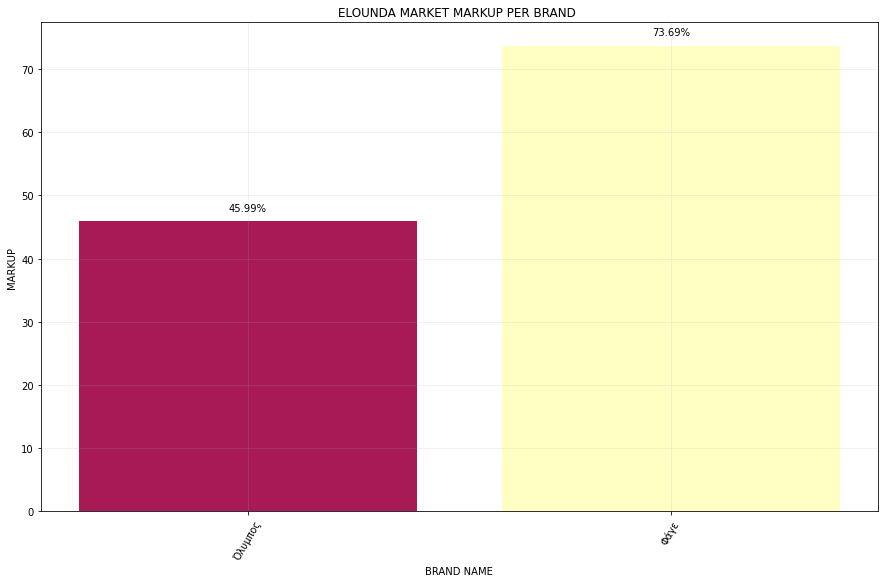